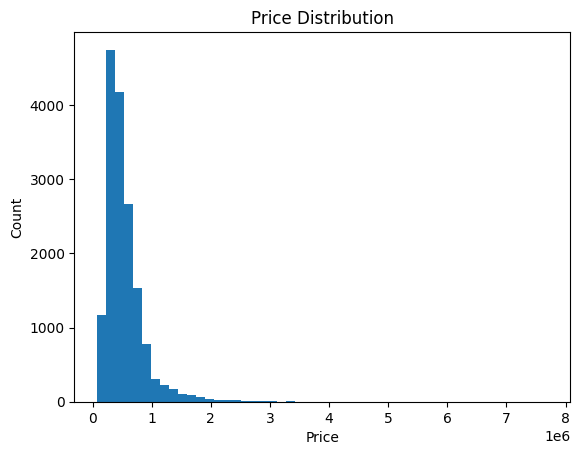

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("train.csv")

# ------------------------------
# 1. Price Distribution
# ------------------------------
plt.figure()
plt.hist(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

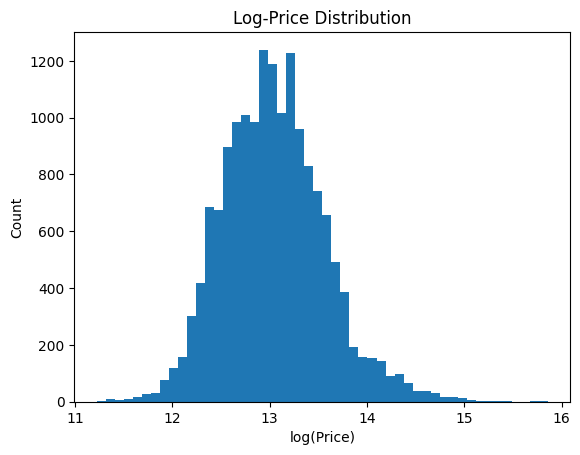

In [ ]:
# ------------------------------
# 2. Log-Price Distribution
# ------------------------------
plt.figure()
plt.hist(np.log(df["price"]), bins=50)
plt.title("Log-Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()

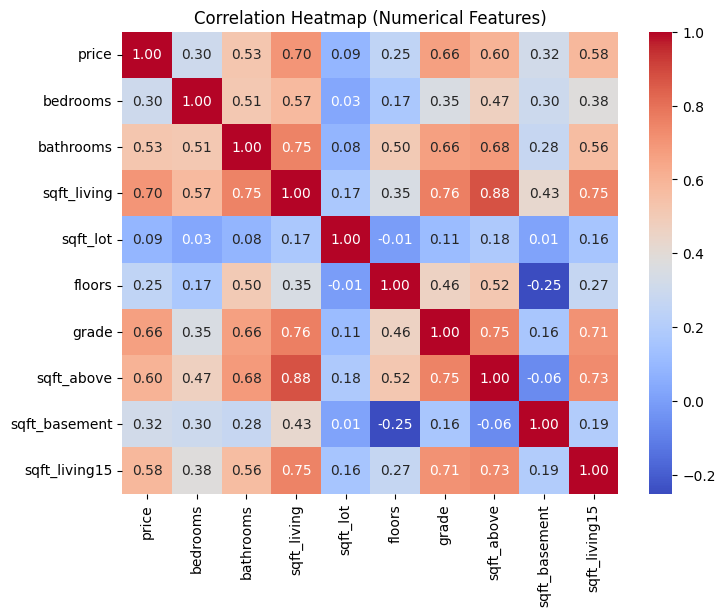

In [ ]:
# ------------------------------
# 3. Correlation Heatmap
# ------------------------------
num_cols = [
    "price","bedrooms","bathrooms","sqft_living","sqft_lot",
    "floors","grade","sqft_above","sqft_basement","sqft_living15"
]

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

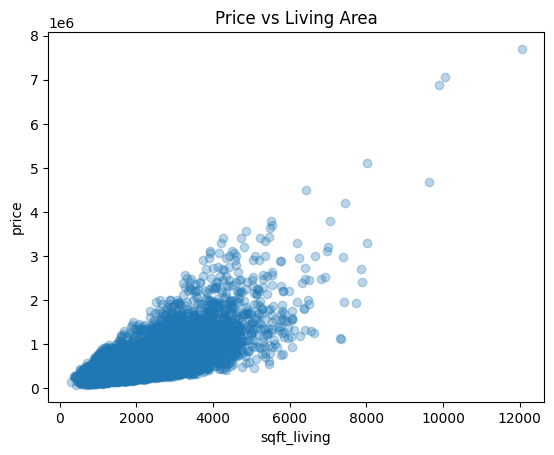

In [ ]:
# ------------------------------
# 4. Price vs Living Area
# ------------------------------
plt.figure()
plt.scatter(df["sqft_living"], df["price"], alpha=0.3)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Price vs Living Area")
plt.show()

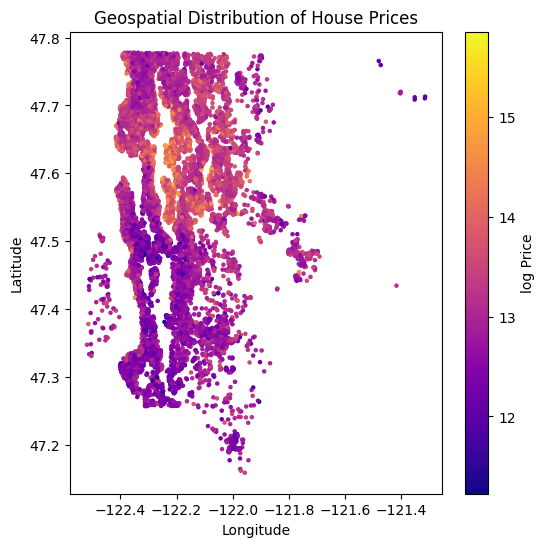

In [ ]:
# ------------------------------
# 5. Geospatial Price Distribution
# ------------------------------
plt.figure(figsize=(6,6))
plt.scatter(df["long"], df["lat"], c=np.log(df["price"]), cmap="plasma", s=5)
plt.colorbar(label="log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of House Prices")
plt.show()

In [ ]:
# ------------------------------
# Price Summary Statistics
# ------------------------------
price_stats = {
    "min_price": df["price"].min(),
    "max_price": df["price"].max(),
    "mean_price": df["price"].mean(),
    "median_price": df["price"].median(),
    "std_price": df["price"].std()
}

for k, v in price_stats.items():
    print(f"{k}: {v:,.2f}")


min_price: 75,000.00
max_price: 7,700,000.00
mean_price: 537,470.28
median_price: 450,000.00
std_price: 360,303.58


In [ ]:
# ------------------------------
# Price Percentiles
# ------------------------------
percentiles = df["price"].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

print(percentiles.apply(lambda x: f"{x:,.0f}"))

0.01      154,536
0.05      210,000
0.25      320,000
0.50      450,000
0.75      640,000
0.95    1,150,000
0.99    1,944,600
Name: price, dtype: object


In [ ]:
import pandas as pd

# Load training data
df = pd.read_csv("train_cdc.csv")

# ------------------------------
# Top 5 Highest Price Houses
# ------------------------------
top_5 = df.sort_values(by="price", ascending=False).head(5)
top_5_ids = top_5[["id", "price"]]

print("Top 5 Highest Price Houses:")
print(top_5_ids)

# ------------------------------
# Bottom 5 Lowest Price Houses
# ------------------------------
bottom_5 = df.sort_values(by="price", ascending=True).head(5)
bottom_5_ids = bottom_5[["id", "price"]]

print("\nBottom 5 Lowest Price Houses:")
print(bottom_5_ids)


Top 5 Highest Price Houses:
               id    price
4962   6762700020  7700000
1499   9808700762  7062500
2115   9208900037  6885000
9264   1247600105  5110800
10412  1924059029  4668000

Bottom 5 Lowest Price Houses:
               id  price
3656   3421079032  75000
3789   8658300340  80000
16074  3028200080  81000
10552  3883800011  82000
10246  1523049188  84000
